In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/hotel_review_75000.csv', encoding='utf-8')

In [4]:
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [5]:
stopwords = pd.read_csv('./data/한국어불용어100.txt', header=None)

In [6]:
stopwords.head()

,0
0,이
1,있
2,하
3,것
4,들


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [8]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'hotelId', 'hotelName', 'tripType',
       'tripTypeText', 'reviewDate', 'rating', 'description', 'isKorNot'],
      dtype='object')

In [9]:
data = data[['rating', 'description']]

In [10]:
data.head()

,rating,description
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,10.0,가격에 맞게 만족했습니다
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...


In [11]:
data['description']

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [12]:
data['description'][50]

'시설도 깨끗하고 좋았습니다 특히 사정이 있어 저녁시간에 와인을 마시러 못갔었는데 들어와보니 와인과 과일이 있어서 놀랐습니다 사소한것 하나하나 신경써주셔서 감사합니다'

In [13]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

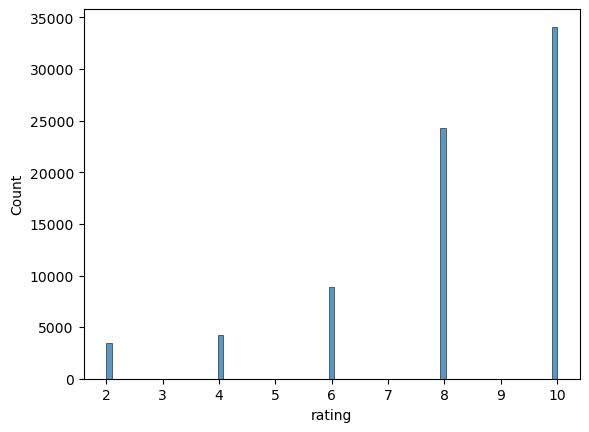

In [14]:
sns.histplot(data['rating'])

In [15]:
data[data['rating'] == 8.0]

,rating,description
13,8.0,주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케...
18,8.0,직원 친절하고 시설 좋았음
21,8.0,조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많...
33,8.0,인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 ...
37,8.0,따뜻한 느낌의 서비스
...,...,...
74989,8.0,설악산이근처에있고 작지만시설도 괜찮았고 만족한여행이었습니다
74993,8.0,ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...


In [16]:
list(data.loc[data['rating']==6, 'description'])[0]

'4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실망이 컸습니다주변이 너무 시끄럽습니다 호텔 바로 앞에서 시위하는 사람들이 있는데 아침 640에도 확성기 소리가 나서 깨었습니다 게다가 주말에 시청 근처에서 시위가 많아서 오후엔 낮잠을 잘 수 없을 정도입니다 예약할 때 이러한 소음이 존재한다는 것을 알았으면 절대 가지 않았을 겁니다executive로의 업그레이드에 대한 공지가 예약할 때 제대로 이뤄어지지 않아 막상 체크인 당일에 하려고 하니 인원이 찼다고 거절당했습니다 식구들이 이 호텔 사우나를 좋아해서 예약했는데 사우나 사용시 추가 요금이 부담스러운 가격입니다 시청 앞 시위 그리고 호텔 앞에서 매일 일어나는 시위가 잠잠해질 때까지 예약하는 것을 신중하게 고려하세요'

In [17]:
data[data['rating'] == 6.0]['description']

30       4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...
35                                   서비스 친절도가 프로답지않은 느낌입니다
51       친절하고 서비스는 좋았음청결도는 문제가 있어 보임 화장실 바닥 버석거림 욕조 내부 ...
79       일단 5성급 호텔이라 깨끗하지만 몇가지 단점이 있음115시 체크인 시간을 너무 무리...
89              깨끗했지만 화장실 욕조 옆에 물이 잘 안빠져서 불편했어요그 외에는 좋았습니다
                               ...                        
74975    주변도   시내가  가까워  좋고로비에  커피솦도  있어  좋고아침식사도  좋고  ...
74982                          별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다
74990    방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992    우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이  적음 ...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 8877, dtype: object

In [18]:
data[data['rating'] == 8.0]['description']

13       주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케...
18                                          직원 친절하고 시설 좋았음
21       조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많...
33       인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 ...
37                                             따뜻한 느낌의 서비스
                               ...                        
74989                     설악산이근처에있고 작지만시설도 괜찮았고 만족한여행이었습니다
74993    ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
Name: description, Length: 24283, dtype: object

In [19]:
for i in list(data.loc[data['rating']==8, 'description'])[10:30]:
    print(i)

숙박은 좋았으나 사우나 비용이 너무 비싼 것 같습니다
위치를 비롯해서 대부분 만족해요
편하게 잘 쉬다가 왔습니다
공기가 탁했어요 방에서도 조식시간이나 저녁시간에 음식 냄새가 들어오기도하고 먼가 공기가 쾌쾌한 것 같았어요 나머지는 서비스는 너무너무 괜찮았습니다
청소를 좀 깔끔히 해주셨으면 합니다
대체적으로 만족합니다 한가지채크인이몰려 대기시간이너무 길었습니다 개선이 필요해보입니다
뷰는 앞에 큰건물이 막고있어서 별로였지만 쾌적했어요 직원분들이 하나같이 다들 친절했어요
침대도 넘 편하고 방도 오래됬지만 깔끔했어요사우나도 깨끗하고 직원들도 친절하고 좋았어요다만 플레이트에 제공된 조식은 식어있는 것을 넘어 차가웠고 고기는 뻣뻣해서 아이가 거의 못먹었어요 라운지 음식보다도 못했어요
가운에 얼룩있는거 빼고는 그냥 무난했어요조식 맛있고 애프터눈티에 마카롱 맛있어요
조식이랑 바는 음식들이 별로에요 복잡하고 종류도없네요
모든 직원들이 무척 친절합니다 호텔 자체가 오래되긴 했지만 객실은 깨끗합니다 조식 뷔페도 아주 굿굿
체크인때 주차부터 모든 직원분들이 친절하셨고 쾌적하게 잘 지내고 왔습니다
클래식한 경험이었습니다  거의 모든 면에서 만족스러웠습니다
한국을 대표하는 호텔중 한 곳인데 지은지 오래되어 그런지 객실 내부와 화장실의 각종 시설물벽 문 문턱 창틀 등등이 낡은 느낌 리데코래이션이 필요함
두 번째 이용인데 역시 깨끗하고 편안하고 너무 좋았어요 일단 위치너무 좋구요 수영장 아담하지만 채광이 좋아 아주 좋았어요
깨끗하고 조용하게 잘 쉬다왔습니다
친절해요 주변에 업무가 있어서 묵었는데향기와 그림이 있었으면 더 좋을 것 같아요 전체적으로 어두운데 향기도 없고 꽃도 미미하고 그림도 미미해서  라운지도 사무실에서 밥먹는 느낌 시각과 후각이 공간을 빛내야 대접받고 쉬는 느낌인데 그냥 잘 자다 왔어요 수영장 좋더라구요
깨끗하고 방도 업그레이드 해주셔서 넘 좋았어요근데 사람이 너무 많아서 라운지에 줄이 너무 길고 붐벼서 체크인할때 체크아웃 할때도 시간이 오래 걸렸어요칵테일 아워 때도 라운지

In [20]:
data['isgood'] = data['rating'].apply(lambda x : 1 if x >= 8 else 0)

In [21]:
data.head()

,rating,description,isgood
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1
3,10.0,가격에 맞게 만족했습니다,1
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1


# Konlpy의 Mecab을 이용해 형태소 분리

In [22]:
from konlpy.tag import Mecab
mecab = Mecab()

In [23]:
data['description2'] = data['description'].apply(lambda x : mecab.nouns(x))

In [24]:
data

,rating,description,isgood,description2
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,10.0,가격에 맞게 만족했습니다,1,"[가격, 만족]"
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."
...,...,...,...,...
74995,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,1,"[조식, 스탠더드, 하프, 전망, 신청, 박, 가격, 앞, 건물, 전망, 차, 가격..."
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,1,"[객실, 에메, 니티, 필요, 만큼, 분, 거리, 중앙, 시장, 쇼핑]"
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,1,"[배드, 찬바람, 난방기, 시간, 정도]"
74998,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,1,"[위치, 숙소, 짐, 주변, 곳, 먹거리, 곳, 바다, 전망, 굿]"


In [25]:
type(stopwords)

pandas.core.frame.DataFrame

In [26]:
stopwords = list(stopwords[0])

In [27]:
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

In [28]:
stopwords.extend(['들', '나', '된', '과', '은', '가', '에', '호텔', '것', '수'])

In [29]:
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 '들',
 '나',
 '된',
 '과',
 '은',
 '가',
 '에',
 '호텔',
 '것',
 '수']

# 단어 빈도분석

In [30]:
word_dist = []
for i in data['description'][:1]:
    print(i)
    for j in i:
        print(j)

직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비해 약간 부족합니다
직
원
들
 
서
비
스
나
 
마
인
드
 
완
벽
합
니
다
 
다
만
 
노
후
된
 
시
설
과
 
좁
은
 
라
운
지
가
 
호
텔
 
이
름
에
 
비
해
 
약
간
 
부
족
합
니
다


In [31]:
word_dist = []
for i in data['description2']:
    for j in i:
        if j not in stopwords:
             word_dist.append(j)
#     print(word_dist)
    
print(len(word_dist))

848860


In [32]:
from nltk.probability import FreqDist
import koreanize_matplotlib

In [33]:
FreqDist(word_dist)

FreqDist({'방': 13963, '친절': 13472, '만족': 13058, '시설': 11505, '직원': 11089, '조식': 11004, '이용': 10289, '위치': 9001, '객실': 8717, '주변': 8010, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

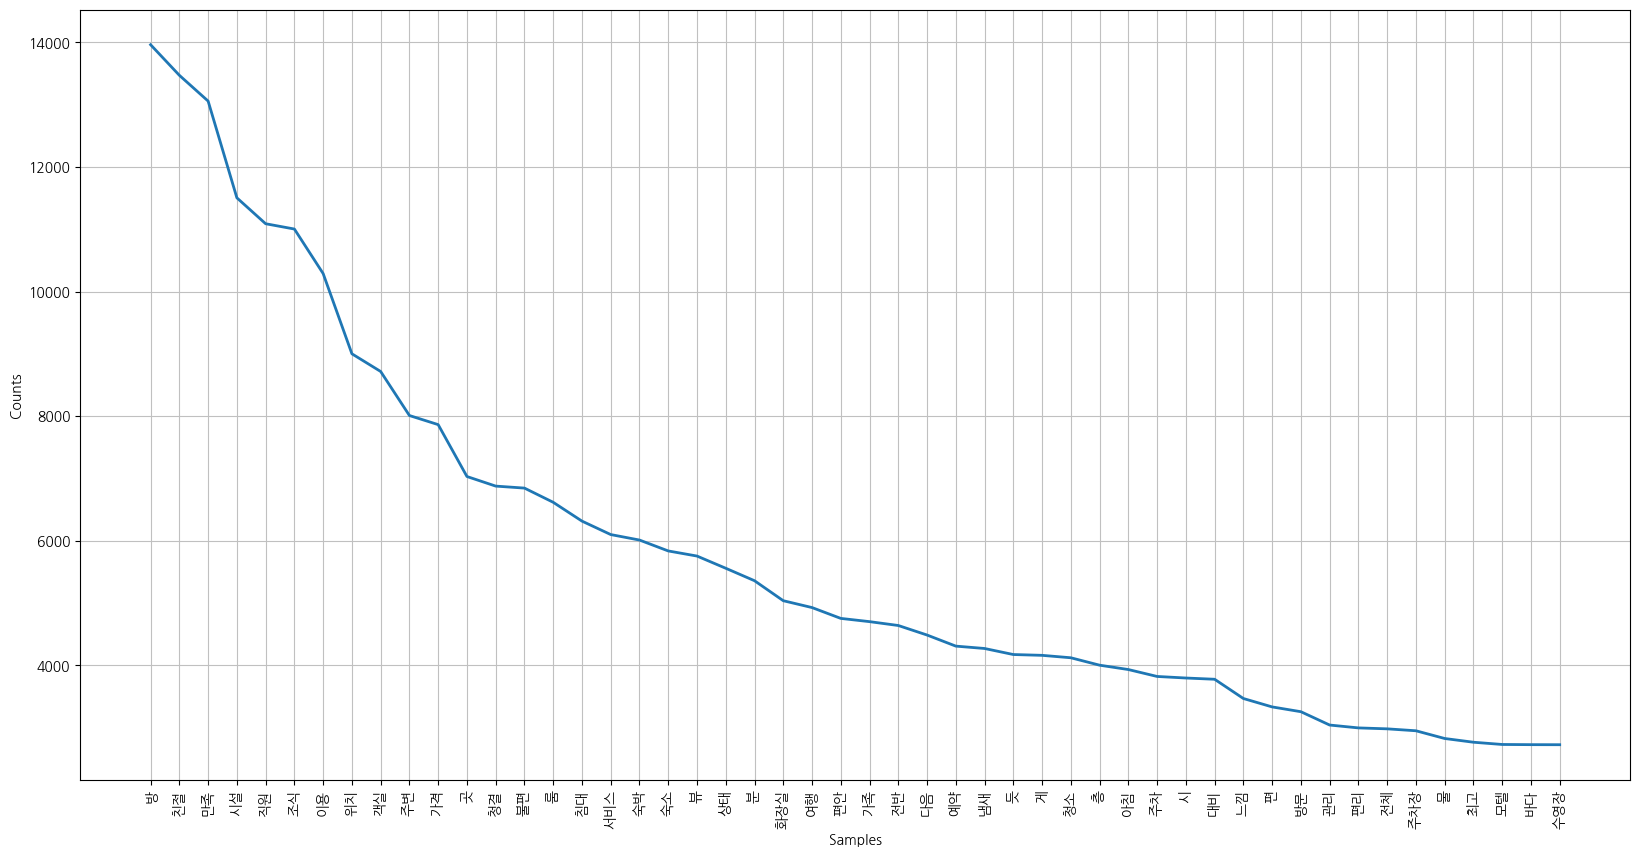

In [34]:
plt.figure(figsize=(20,10))
FreqDist(word_dist).plot(50)

In [35]:
from wordcloud import WordCloud

In [36]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

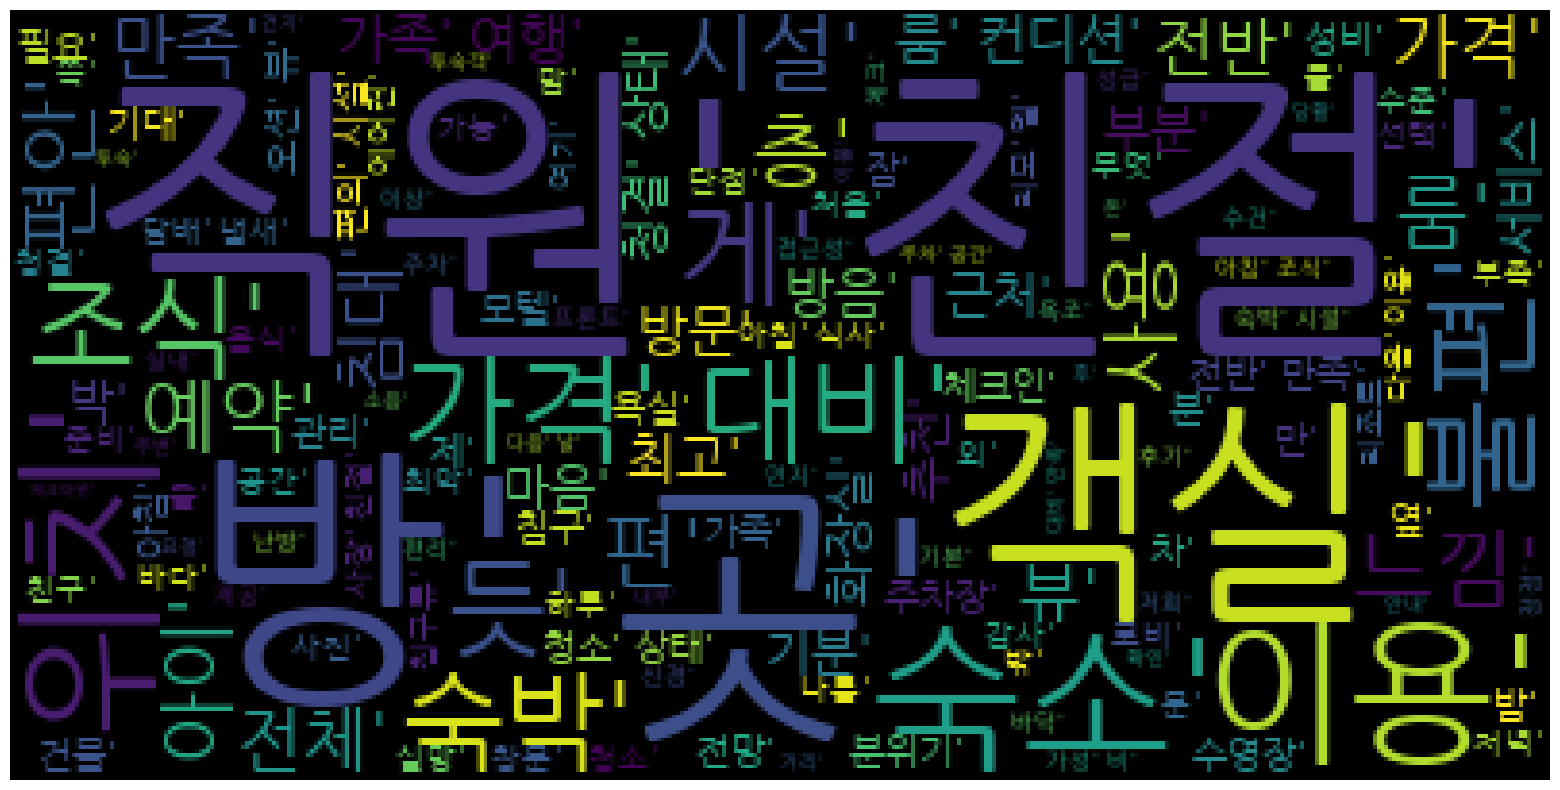

In [37]:
plt.figure(figsize=(20,10))
wc = WordCloud(font_path=font_path).generate(str(word_dist))
plt.imshow(wc)
plt.axis('off')

# 만족한 고객 vs 불만족 고객

In [38]:
good = data[data['isgood'] == 1]['description2']
good

0              [직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]
1            [웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]
2        [서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,...
3                                                 [가격, 만족]
4        [처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ...
                               ...                        
74994                                                   []
74995    [조식, 스탠더드, 하프, 전망, 신청, 박, 가격, 앞, 건물, 전망, 차, 가격...
74996              [객실, 에메, 니티, 필요, 만큼, 분, 거리, 중앙, 시장, 쇼핑]
74997                               [배드, 찬바람, 난방기, 시간, 정도]
74998                [위치, 숙소, 짐, 주변, 곳, 먹거리, 곳, 바다, 전망, 굿]
Name: description2, Length: 58386, dtype: object

In [39]:
bad = data[data['isgood'] == 0]['description2']
bad

15       [가성, 별로, 기대, 실망, 예약, 사전, 메일, 직원, 통화, 객실, 요청, 고...
30       [번, 호텔, 방문, 것, 예전, 호텔, 이번, 실망, 주변, 호텔, 앞, 시위, ...
35                                       [서비스, 절도, 프로, 느낌]
41       [보통, 뷰, 처음, 국내외, 특급, 호텔, 곳, 중, 최악, 당일, 예약, 데이터...
43       [고객, 개, 법, 호텔, 역사, 명불허전, 종업원, 모두, 최상, 서비스, 무엇,...
                               ...                        
74979    [송풍기, 환풍기, 소음, 난방, 공조, 시스템, 작동, 때, 모텔, 차이, 최근,...
74982                                       [비지니스, 호텔, 느낌]
74990    [방, 생각, 수기, 박, 만, 원, 숙소, 조리, 시설, 냉장고, 냉장고, 기능,...
74992    [수건, 비치, 수건, 건, 청소, 상태, 확인, 듯, 주차, 구역, 편의, 시설,...
74999             [주차장, 부족, 데, 주차, 아침, 이동, 전화, 주차, 관리, 신경]
Name: description2, Length: 16614, dtype: object

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

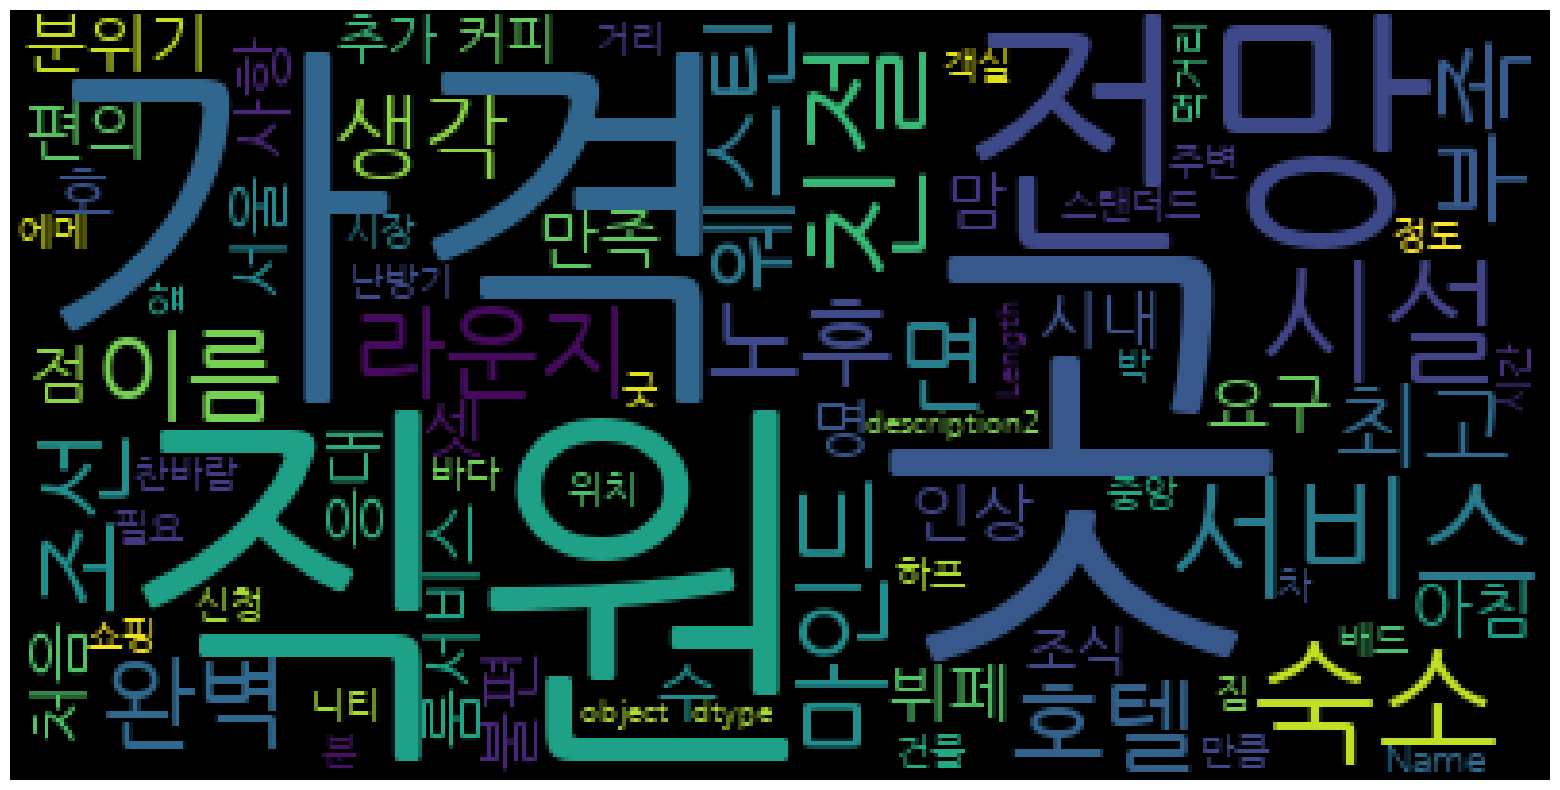

In [40]:
plt.figure(figsize=(20,10))
wc = WordCloud(font_path=font_path).generate(str(good))
plt.imshow(wc)
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

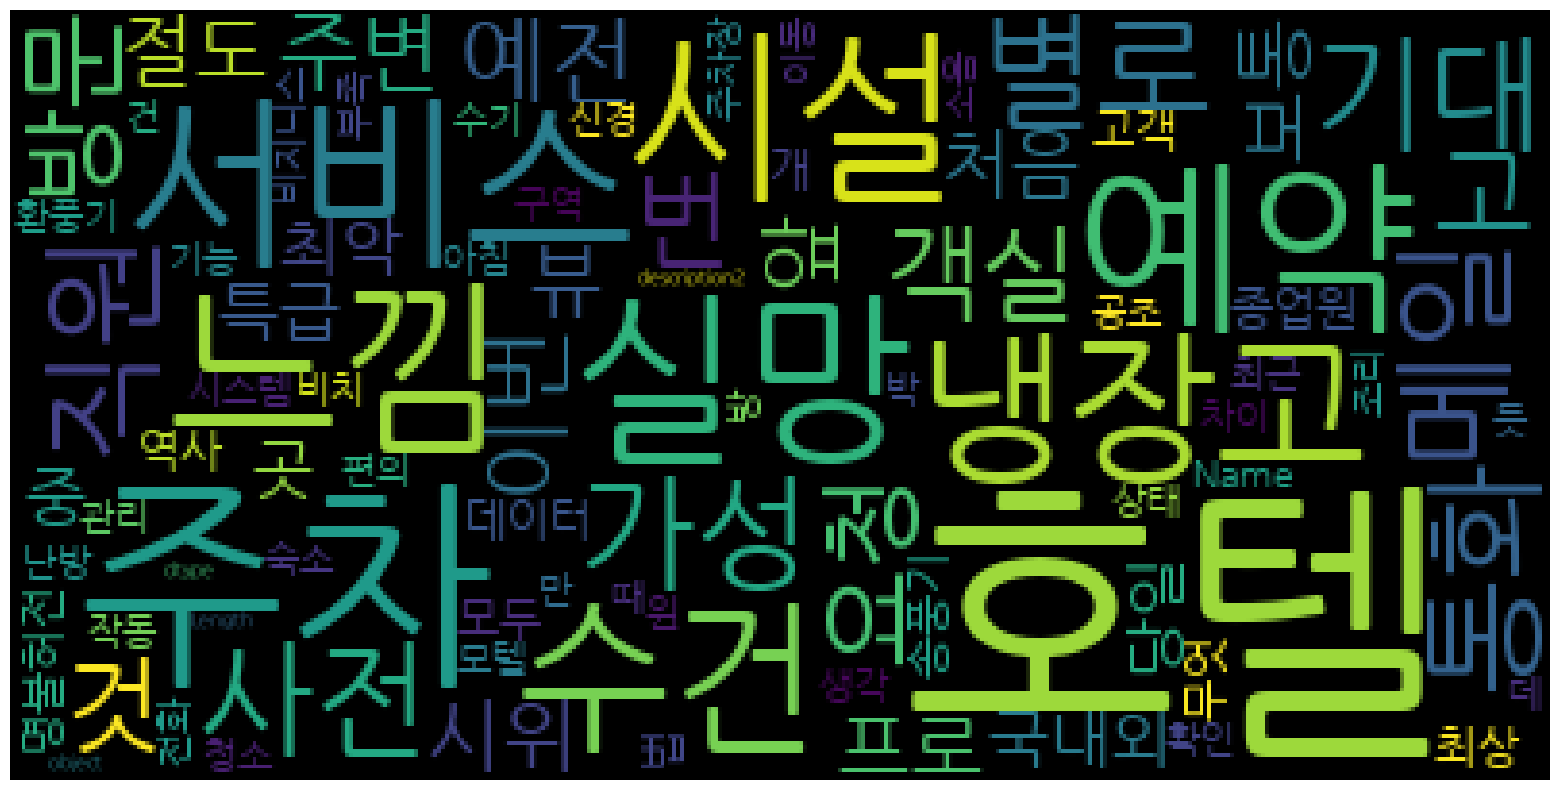

In [41]:
plt.figure(figsize=(20,10))
wc = WordCloud(font_path=font_path).generate(str(bad))
plt.imshow(wc)
plt.axis('off')

In [42]:
data.loc[(data['description'].str.contains('주차')) & (data['isgood'] == 0), 'description']

228      해외에서  이용 시 만족했던 그랜드하얏트라 우리나라도 한번 예약해봤던 곳이나 체크인...
292      1 다른 호텔과 구별되는 룸의 특징이라면 침대 공간은 넓게 잡은 반면 화장실과 욕조...
356                             기대에 못미치는 시설 특히 주차요원들의 무성의함
429      특급 호텔이라는 기대와는 달리 그냥 평범한 호텔이었습니다차를 가지고 호텔입구에 도달...
431      스위트룸 예약인데 발렛파킹이 안됨만차 짐도 많은데 차안서 기다리라고함서비스 개판  ...
                               ...                        
74957    춘천에겄다가 속초로방향을잡아 속초의랜드마크라하여 이호텔을 선택 일단 객실은 많은듯했...
74959    숙소내 주차장은 규모에 비해 협소하다는 느낌이며 호텔 앞 공영주차장 이용하면 됨엘리...
74990    방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992    우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이  적음 ...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 1285, dtype: object

In [43]:
for i in data.loc[(data['description'].str.contains('주차')) & (data['isgood'] == 0), 'description'][:50]:
    print(i)
    print()

해외에서  이용 시 만족했던 그랜드하얏트라 우리나라도 한번 예약해봤던 곳이나 체크인 시 안내 받았던 룸과 클럽라운지에서 대기하며 안내받은 룸이 달라 문의하였지만 적극적으로 확인해주거나 응대하지 않아 불쾌했으며 라운지 이용시간 및 부대시설이용에 대한 설명이 부족했고 직원에서 라운지 이브닝타임을 문의했었는데 한명은 5시로 5시에 준비가 안되어 다른 직원에게 문의하니 6시로 안내받았습니다 그밖에도 여러가지로 불편했으며 투숙객임에도 유료주차라는 것은 개선이 되었으면 합니다 유료주차는 처음이라하니 아니라고 요즘호텔은 거의 유료라며 직원은 마치 호텔을 많이 이용 안하는 손님이라는 생각으로 말하는 뉘앙스로 응대하고 더구나 차량 등록을 했음에도 출차시 차단 바가 열리지 않는 등 5성급 호텔 수준은 아닌 듯 합니다 재방문의사는 당연히 없습니다 게스트 서비스나 룸서비스 요청 시 응대는 빨랐습니다

1 다른 호텔과 구별되는 룸의 특징이라면 침대 공간은 넓게 잡은 반면 화장실과 욕조 공간을 좁게 잡아서 이용이 다소 불편할 정도라는 점입니다 청결도는 좋았지만 룸에 거울이 너무 많이 붙어 있어서 다소 산만하고 어지러운 느낌을 줍니다 아마도 상대적으로 룸을 넓게 보이도록 효과를 주고자 한 것 같은데 처음 잠깐만 그런 인상을 주고 오래 있으면 산만합니다2 책상 하나도 없는 룸은 요즘 룸 추세와는 다소 다르네요3 주차비도 유료입니다 물론 투숙객 할인은 있지만 다소 이해가 되지 않습니다4 코로나때문이라고는 하는데 피트니스에서 운동복도 대여해 주지 않는다고 하더군요 그런 중요한 정책의 변화는 사전에 미리 공지가 되어야고객들에게 개별적으로 알려주지는 않더라도 적어도 호텔 홈페이지나 세부정책 부분에는 소개가 되어 있어야 한다고 생각합니다 마땅할텐데 아무런 사전 고지가 없어서 결국 호텔에 묵으면서 시설을 제대로 이용할 수 없었습니다 근래 계속 다른 호텔도 묵어 보았는데 코로나 때문에 운동복을 대여해주지 않는 호텔은 여기가 처음이었습니다5 원래 메뉴에 없음에도 고기를 먹지 않는 손님을 위해 신속하게 

# Navie Bayes를 이용한 감성분석

In [44]:
data.head()

,rating,description,isgood,description2
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,10.0,가격에 맞게 만족했습니다,1,"[가격, 만족]"
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."


In [45]:
X = data['description']
y = data['isgood']

In [46]:
y.value_counts()

isgood
1    58386
0    16614
Name: count, dtype: int64

# 형태소 나누기

In [47]:
from konlpy.tag import Mecab
mecab = Mecab()

In [48]:
def tokenizer(x):
    token = mecab.morphs(x)
    return token

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [50]:
cv = CountVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1,3), stop_words=stopwords)
X_cv = cv.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cv, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [53]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))

test_pred = mnb.predict(X_test)
print('='*20, 'test result', '='*20)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      3321
           1       0.93      0.89      0.91     11679

    accuracy                           0.86     15000
   macro avg       0.80      0.83      0.81     15000
weighted avg       0.87      0.86      0.87     15000

==================== test result ====================
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      3308
           1       0.93      0.89      0.91     11692

    accuracy                           0.86     15000
   macro avg       0.80      0.83      0.81     15000
weighted avg       0.88      0.86      0.87     15000



In [54]:
X

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

# TfidfVectorizer

In [55]:
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 '들',
 '나',
 '된',
 '과',
 '은',
 '가',
 '에',
 '호텔',
 '것',
 '수']

In [59]:
tfidf_cv = TfidfVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1, 3), stop_words=stopwords)
X_tfidf = tfidf_cv.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [60]:
# 학습/검증/테스트 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [62]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))

test_pred = mnb.predict(X_test)
print('='*20, 'test result', '='*20)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.33      0.48      3321
           1       0.84      0.99      0.91     11679

    accuracy                           0.84     15000
   macro avg       0.86      0.66      0.69     15000
weighted avg       0.85      0.84      0.81     15000

==================== test result ====================
              precision    recall  f1-score   support

           0       0.86      0.35      0.49      3308
           1       0.84      0.98      0.91     11692

    accuracy                           0.84     15000
   macro avg       0.85      0.66      0.70     15000
weighted avg       0.85      0.84      0.82     15000



# SMOTE 로 데이터 증폭 후 분석

In [63]:
# !pip install imbalanced-learn

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smt = SMOTE(random_state=7)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [66]:
y_train_smt.value_counts()

isgood
1    35015
0    35015
Name: count, dtype: int64

In [67]:
X_train_smt

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5344475 stored elements and shape (70030, 140332)>

In [69]:
mnb = MultinomialNB()
mnb.fit(X_train_smt, y_train_smt)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))

test_pred = mnb.predict(X_test)
print('='*20, 'test result', '='*20)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.62      0.84      0.72      3321
           1       0.95      0.86      0.90     11679

    accuracy                           0.85     15000
   macro avg       0.79      0.85      0.81     15000
weighted avg       0.88      0.85      0.86     15000

==================== test result ====================
              precision    recall  f1-score   support

           0       0.62      0.84      0.72      3308
           1       0.95      0.86      0.90     11692

    accuracy                           0.85     15000
   macro avg       0.79      0.85      0.81     15000
weighted avg       0.88      0.85      0.86     15000



#### 내가 한 거

In [ ]:
import string

In [ ]:
string.punctuation

# 정규표현식

In [ ]:
import re

In [ ]:
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = " ".join(matches)
    return matches

In [ ]:
data['description'].apply(text_clean)

In [ ]:
data['description'] = data['description'].apply(text_clean)

In [ ]:
data['description']

In [ ]:
X = data['description']
y = data['rating']

In [ ]:
X

In [ ]:
y

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
def tokenizer(text):
    tokens = mecab.morphs(text)
    # print(tokens)
    return tokens

In [ ]:
tokenizer(data['description'][4])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=3, ngram_range=(1,2))
train_X_cv = cv.fit_transform(train_X)
test_X_cv = cv.transform(test_X)

In [ ]:
whole_words=[]
for words in data['description']:
    for word in words.split():
        whole_words.append(word)

In [ ]:
whole_words

In [ ]:
from nltk.probability import FreqDist

In [ ]:
FreqDist(whole_words)

In [ ]:
from matplotlib import font_manager, rc
import platform

In [ ]:
# 한글 폰트 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumGothic.ttf').get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':  # MacOS
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic')

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 그래프 예시
plt.figure(figsize=(20, 10))
FreqDist(whole_words).plot(50)

In [ ]:
result = " ".join(whole_words)
print(len(result))

# word Cloud 만들기

In [ ]:
from wordcloud import WordCloud

In [ ]:
# 한글 폰트 경로 설정 (NanumGothic 폰트가 설치되어 있어야 합니다)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 워드클라우드 생성
wc = WordCloud(font_path=font_path).generate(result)

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 워드클라우드 이미지 표시
plt.imshow(wc, interpolation='bilinear') # interpolation='bilinear' 글자 이미지 부드럽게

# 축 숨기기
plt.axis('off')

In [ ]:
data2 = pd.concat([X,y], axis=1)
data2

In [ ]:
good = data2.loc[data['rating'] >= 8.0, 'description']
good.head()

In [ ]:
bad = data2.loc[data['rating'] < 8.0, 'description']
bad.head()

In [ ]:
good_text = " ".join(list(good))
len(good_text)

In [ ]:
bad_text = " ".join(list(bad))
len(bad_text)

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=font_path).generate(good_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=font_path).generate(bad_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

In [ ]:
#

# 나이브 베이즈를 이용해서 감성분석하기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
test_X = [good_text, bad_text]
X_vec = cv.fit_transform(test_X)
X_vec

In [ ]:
# good_text와 bad_text를 결합하여 리스트로 입력
test_X2 = [good_text, bad_text]
test_y2 = [1, 0]  # good_text는 1, bad_text는 0으로 레이블

# CountVectorizer를 사용하여 벡터화
cv2 = CountVectorizer()
X_vec2 = cv2.fit_transform(test_X2)

# train과 test 데이터로 나누기 (여기서는 두 개의 큰 문서만 있으므로 train/test split을 생략할 수 있음)
mnb2 = MultinomialNB()
mnb2.fit(X_vec2, test_y2)

# 예측 및 성능 평가
pred2 = mnb.predict(X_vec2)
print(accuracy_score(test_y2, pred2))
print(classification_report(test_y2, pred2))

In [ ]:
cv = CountVectorizer()

# good과 bad 리스트를 결합하여 CountVectorizer에 입력
test_X = good.tolist() + bad.tolist()  # 개별 문장 리스트로 변환
test_y = [1] * len(good) + [0] * len(bad)  # good은 1, bad는 0으로 레이블 생성

# 텍스트 데이터를 벡터화
X_vec = cv.fit_transform(test_X)

test_y = [1] * len(good) + [0] * len(bad) 부분은 good과 bad 데이터를 기반으로 레이블(y)을 생성하는 코드입니다.<br>
이 코드는 good 데이터를 1로, bad 데이터를 0으로 레이블링하여 분류 작업에 사용될 목표 변수를 만드는 과정

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_vec, test_y, test_size=0.2, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size =0.5, random_state=7)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

In [ ]:
data['rating'].nunique()

# Konlpy의 Mecab을 이용해 형태소 분리

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
def tokenizer(text):
    tokens = mecab.morphs(text)
    return tokens

In [ ]:
tokenizer(data['description'][1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X_cv, train_y, test_size=0.4, random_state=7)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
test_pred = mnb.predict(test_X_cv)
print(accuracy_score(test_y, test_pred))
print(classification_report(test_y, test_pred))

In [ ]:
plt.figure(figsize=(20,10))
FreqDist(whole_words).plot(50)